<a href="https://colab.research.google.com/github/Dante1902/Tort-Al/blob/main/%D0%90%D0%BD%D0%BE%D0%BC%D0%B0%D0%BB%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 3.0 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
from sklearn.utils import check_random_state
from hmmlearn import hmm
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [9]:
df = pd.read_csv('/content/NoAnomaly/art_flatline.csv')

In [10]:
print("Shape of the dataset:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nSummary statistics of the dataset:")
print(df.describe())
print("\nInformation about the dataset:")
print(df.info())

# Посчитать количество пустых значений в признаках с помощью библиотеки numpy
print("\nNumber of missing values in each feature:")
print(np.sum(df.isnull()))

Shape of the dataset: (4032, 2)

First 5 rows of the dataset:
             timestamp  value
0  2014-04-01 00:00:00   45.0
1  2014-04-01 00:05:00   45.0
2  2014-04-01 00:10:00   45.0
3  2014-04-01 00:15:00   45.0
4  2014-04-01 00:20:00   45.0

Summary statistics of the dataset:
        value
count  4032.0
mean     45.0
std       0.0
min      45.0
25%      45.0
50%      45.0
75%      45.0
max      45.0

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4032 non-null   object 
 1   value      4032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.1+ KB
None

Number of missing values in each feature:
timestamp    0
value        0
dtype: int64


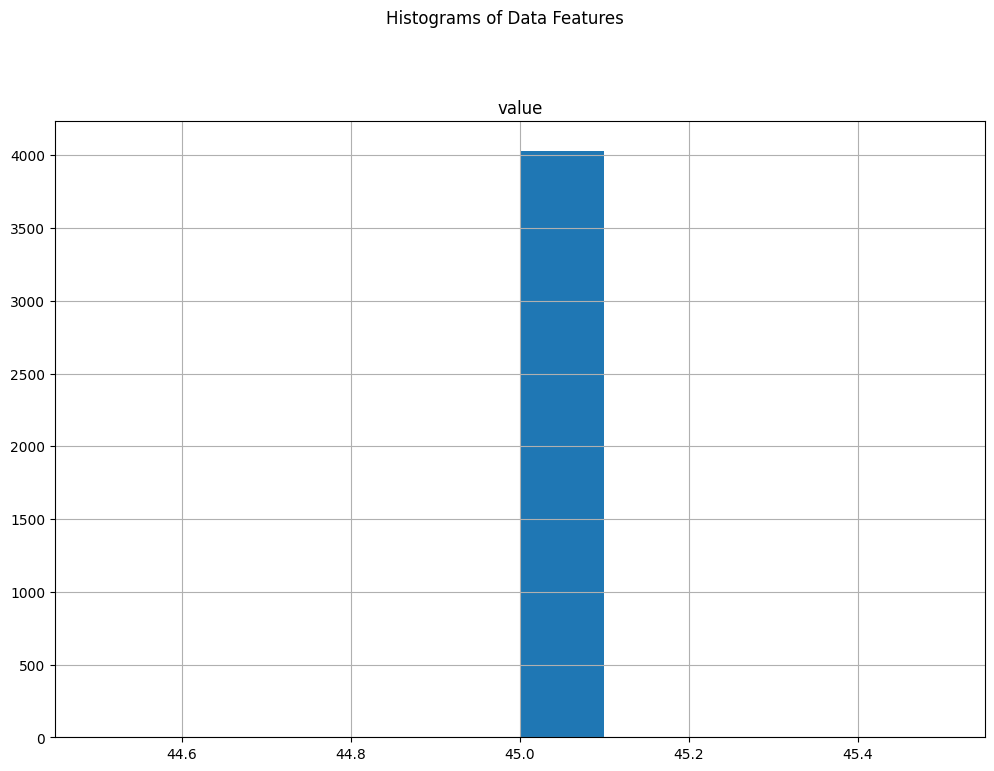

<Figure size 1200x800 with 0 Axes>

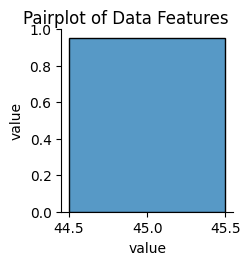

In [11]:
# 3. Произвести разведочный анализ данных
# Гистограммы распределения данных
df.hist(figsize=(12, 8))
plt.suptitle('Histograms of Data Features', y=1.02)
plt.show()

# Графики распределения данных (пример с seaborn)
plt.figure(figsize=(12, 8))
sns.pairplot(df)
plt.suptitle('Pairplot of Data Features', y=1.02)
plt.show()

In [12]:
# Для примера, используем метод k-средних
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
X = df[['value']].values  # Подставьте нужные признаки
kmeans.fit(X)
df['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-12-dc58bf42ebfd>:5: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(X)


In [13]:
# 6. Произвести обучение моделей библиотеки sklearn
# 6.1 Метод k-средних (k-means clustering) уже обучен выше

# 6.2 Цепь Маркова (Markov Chain) - пример
model = hmm.GaussianHMM(n_components=2, covariance_type="full", random_state=42)
X = df[['value']].values  # Подставьте нужные признаки
model.fit(X)

# 6.3 Изолирующий лес (Isolation forest) - уже обучен выше

# 6.4 Одноклассовый метод опорных векторов (One class SVM) - пример
svm_model = OneClassSVM(kernel='rbf', nu=0.05)
svm_model.fit(X)

/usr/local/lib/python3.10/dist-packages/hmmlearn/hmm.py:302: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans.fit(X)


OneClassSVM(nu=0.05)

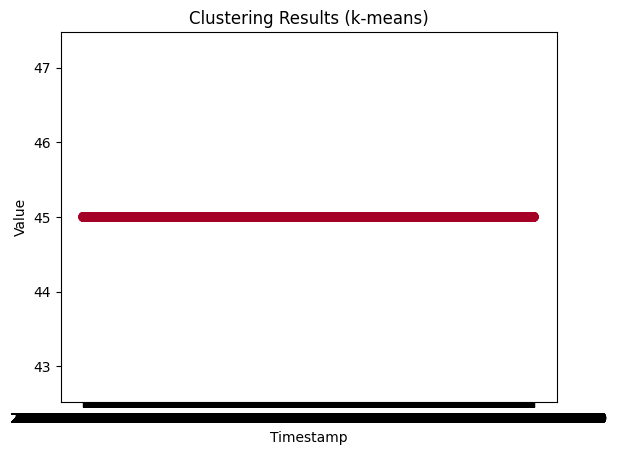

In [15]:
# 7. Разведочный анализ данных для оценки качества обучения модели
# Визуализация результатов для k-средних
plt.scatter(df['timestamp'], df['value'], c=df['cluster'], cmap='RdYlGn')
plt.title('Clustering Results (k-means)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()

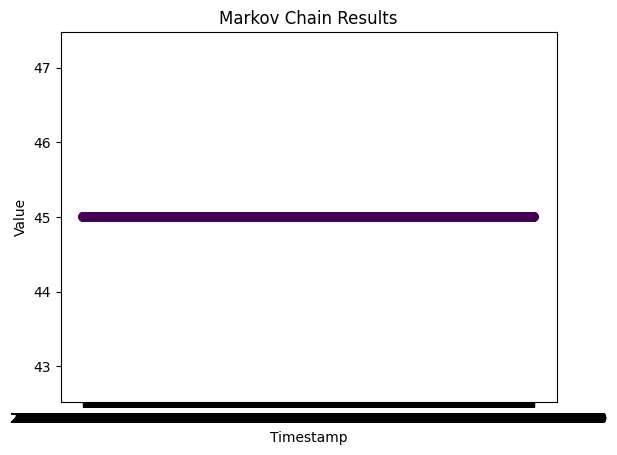

In [16]:
# Визуализация результатов для Цепи Маркова (Markov Chain)
plt.scatter(df['timestamp'], df['value'], c=model.predict(X), cmap='viridis')
plt.title('Markov Chain Results')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()